In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import pearsonr

life_data = pd.read_csv("all_data.csv")
print(life_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


6
['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
The mean life expectancy is 72.78958333333335and the median life expectancy is 76.75
The mean GDP is 3880498570768.396and the median GDP is 1280220000000.0


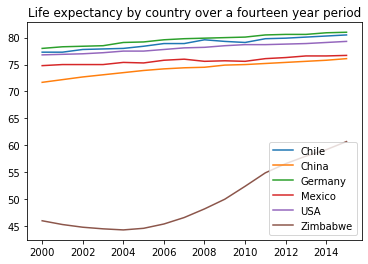

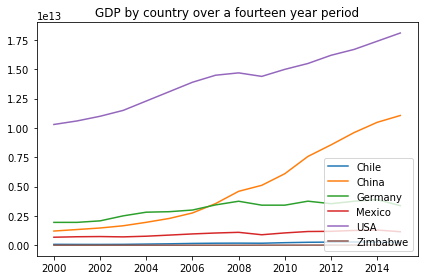

Life expectancy has not changed much over the fourteen year period for most countries here, execpt for Zimbabwe where life expectancy increased from 45 years in 2006 to 60 years in 2015
GDP has changed for most countries over the fourteen year period, with largest changes for China and the USA 
                    Country  Life expectancy at birth (years)
2                   Germany                          79.65625
0                     Chile                          78.94375
4  United States of America                          78.06250
3                    Mexico                          75.71875
1                     China                          74.26250
5                  Zimbabwe                          50.09375
                    Country           GDP
4  United States of America  1.407500e+13
1                     China  4.957714e+12
2                   Germany  3.094776e+12
3                    Mexico  9.766506e+11
0                     Chile  1.697888e+11
5                 

In [8]:
#how many countries do we have in the dataset? want to look at average life expectancy and GDP overall, over time and by countries

print(life_data['Country'].nunique())

countries = life_data['Country'].unique()
print(countries)

mean_life = life_data['Life expectancy at birth (years)'].mean()

mean_gdp =life_data['GDP'].mean()
median_life= life_data['Life expectancy at birth (years)'].median()
median_gdp=life_data['GDP'].median()

print('The mean life expectancy is ' + str(mean_life) + 'and the median life expectancy is ' + str(median_life))
print('The mean GDP is ' + str(mean_gdp) + 'and the median GDP is ' + str(median_gdp))


#lets visualise life expectancy and GDP over the years by each country
#line plot- by years and then colours for each country with legend
#chile 
chile = life_data[life_data.Country == 'Chile']
#chine
china = life_data[life_data.Country == 'China']
#germany
germany = life_data[life_data.Country == 'Germany']
#mexico
mexico = life_data[life_data.Country == 'Mexico']
#US 
usa = life_data[life_data.Country == 'United States of America']
#zimbabwe
#life expectancy
zim = life_data[life_data.Country == 'Zimbabwe']

plt.plot(chile['Year'],chile['Life expectancy at birth (years)'])
plt.plot(china['Year'],china['Life expectancy at birth (years)'])
plt.plot(germany['Year'],germany['Life expectancy at birth (years)'])
plt.plot(mexico['Year'],mexico['Life expectancy at birth (years)'])
plt.plot(usa['Year'],usa['Life expectancy at birth (years)'])
plt.plot(zim['Year'],zim['Life expectancy at birth (years)'])
plt.title('Life expectancy by country over a fourteen year period')
plt.legend(['Chile','China','Germany','Mexico','USA','Zimbabwe'],loc=4)
plt.show()
#GDP

plt.plot(chile['Year'],chile['GDP'])
plt.plot(china['Year'],china['GDP'])
plt.plot(germany['Year'],germany['GDP'])
plt.plot(mexico['Year'],mexico['GDP'])
plt.plot(usa['Year'],usa['GDP'])
plt.plot(zim['Year'],zim['GDP'])
plt.title('GDP by country over a fourteen year period')
plt.legend(['Chile','China','Germany','Mexico','USA','Zimbabwe'],loc=4)
plt.tight_layout()


plt.show()


print('Life expectancy has not changed much over the fourteen year period for most countries here, execpt for Zimbabwe where life expectancy increased from 45 years in 2006 to 60 years in 2015')
print('GDP has changed for most countries over the fourteen year period, with largest changes for China and the USA ')

#life expectancy
life_exp = life_data.groupby(['Country'], as_index=False, sort=False)['Life expectancy at birth (years)'].mean()
print(life_exp.sort_values(by='Life expectancy at birth (years)',ascending=False))
print('The country with highest average life expectancy across the period was Germany with 79.65years')
#mean GDP by country 
GDP = life_data.groupby(['Country'], as_index=False, sort=False)['GDP'].mean()
print(GDP.sort_values(by='GDP',ascending=False))
print('The country with highest GDP was the USA with 1.4*10^13')


In [ ]:
#are GDP and life expectancy correlated? scatterplot
plt.scatter(life_data['Life expectancy at birth (years)'],life_data['GDP'])
plt.title('Relationship between GDP and life expectancy at birth (years)')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP')
plt.show()

print('From the scatterplot its not a linear relationship between life expectancy and GDP, lets explore correlation formally')


cov = np.cov(life_data['Life expectancy at birth (years)'],life_data['GDP'])
print(cov)
corr, p=pearsonr(life_data['Life expectancy at birth (years)'],life_data['GDP'])
print('The correlation was ' + str(corr) + ' indicating a weak positive correlation between life expectancy at birth and GDP')


